In [1]:
from datascience import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
%matplotlib inline


### 코스피 코스닥과 GDP 증감률과의 관계

In [2]:
kospi = Table.read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\코스피증감률.csv")
gdp = Table.read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\GDP증감률.csv").where('년도', are.below(2016))

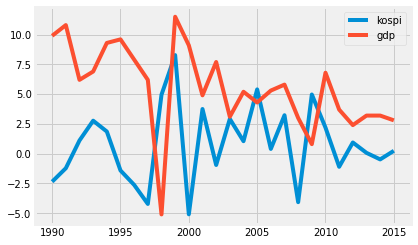

In [3]:
fig = plt.figure()
ax = plt.axes()
ax.plot(kospi['year'], kospi['per']/10, label='kospi');
ax.plot(gdp['년도'], gdp['국내총생산(시장가격, GDP)'], label='gdp')
ax.legend()

### 한국 25~54세 자살률과 경제 성장률의 관계

In [4]:
whosuicide = Table.read_table("https://raw.githubusercontent.com/Sianus/US_Study/wobin/DataScience%20Project/Project/2022.06.21%20Project/Suicid/archive/who_suicide_statistics.csv")
economy=Table().read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\eco.csv")
whosuicide=whosuicide.where('year', are.above_or_equal_to(1990)) #1990년부터
whosuicide=whosuicide.where('suicides_no', are.above_or_equal_to(0)) #nan 제거
whosuicide=whosuicide.where('population', are.above_or_equal_to(0)) #nan 제거
korea=whosuicide.where('country', 'Republic of Korea').group(['year', 'age'], np.sum).drop(2,3) #한국 데이터, 연도와 나이 그룹화
korea['population sum']/=1000 #population sum 단위 조정
korea=korea.relabeled('population sum', 'population(unit : 1000)') #단위 조정
korea=korea.relabeled('suicides_no sum', 'suicides num') #열 이름 변경
korea=korea.with_column('per', 
                (korea['suicides num']/1000)/korea['population(unit : 1000)']*100) #비율 추가
korea=korea.where('age', are.not_equal_to('55-74 years')).where('age', are.not_equal_to('75+ years')) #나이를 5~54세까지로 한정
korea

year,age,suicides num,population(unit : 1000),per
1990,15-24 years,712,8752.7,0.00813463
1990,25-34 years,819,8372.5,0.00978202
1990,35-54 years,978,9762.6,0.0100178
1990,5-14 years,40,7797.5,0.000512985
1991,15-24 years,652,8711,0.00748479
1991,25-34 years,815,8396.3,0.00970666
1991,35-54 years,964,10102.9,0.00954181
1991,5-14 years,42,7672.8,0.000547388
1992,15-24 years,702,8652.2,0.00811354
1992,25-34 years,911,8419.6,0.01082


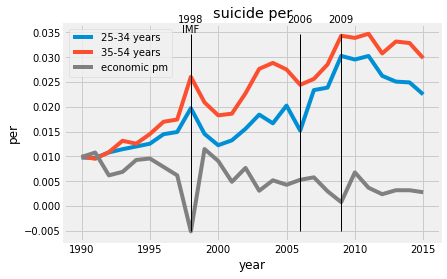

In [5]:
fig = plt.figure()
ax = plt.axes()
korea_25_34=korea.where('age', '25-34 years')
korea_35_54=korea.where('age', '35-54 years')
ax.plot(korea_25_34['year'], korea_25_34['per'], label='25-34 years')
ax.plot(korea_35_54['year'], korea_35_54['per'], label='35-54 years')
ax.plot(economy['year'], economy['per']/1000, label='economic pm', c='grey')
ax.legend()
ax.set(title='suicide per', xlabel='year', ylabel='per')
ax.plot([1998 for _ in range(100)], np.arange(-0.005, 0.035, 0.0004), color='black', linewidth=1)
ax.text(1998, 0.037, "1998", ha='center'); ax.text(1998, 0.035, "IMF", ha='center')
ax.plot([2006 for _ in range(100)], np.arange(-0.005, 0.035, 0.0004), color='black', linewidth=1)
ax.text(2006, 0.037, "2006", ha='center')
ax.plot([2009 for _ in range(100)], np.arange(-0.005, 0.035, 0.0004), color='black', linewidth=1)
ax.text(2009, 0.037, "2009", ha='center');

### 한국 전 연령 자살률과 실업률의 관계

In [6]:
silup = "F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\실업률.csv"
silup = Table.read_table(silup)
silup = silup.with_column('15-24', 
                ((silup['15 - 19세'])+(silup['20 - 24세']))/2)
silup = silup.with_column('25-34', 
                ((silup['25 - 29세'])+(silup['30 - 34세']))/2)
silup = silup.with_column('35-54', 
                ((silup['35 - 39세'])+(silup['40 - 44세'])+(silup['45 - 49세'])+(silup['50 - 54세']))/4).drop(1,2,3,4,5,6,7,8,9,10,11)
silup
silup['15-24']/=250
silup['25-34']/=250
silup['35-54']/=250

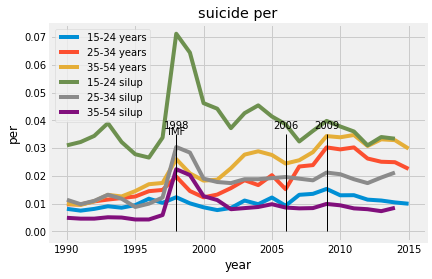

In [7]:
fig = plt.figure()
ax = plt.axes()
korea_15_24=korea.where('age', '15-24 years')
korea_25_34=korea.where('age', '25-34 years')
korea_35_54=korea.where('age', '35-54 years')
ax.plot(korea_15_24['year'], korea_15_24['per'], label='15-24 years')
ax.plot(korea_25_34['year'], korea_25_34['per'], label='25-34 years')
ax.plot(korea_35_54['year'], korea_35_54['per'], label='35-54 years')
ax.plot(silup['년도'], silup['15-24'],label='15-24 silup')
ax.plot(silup['년도'], silup['25-34'],label='25-34 silup')
ax.plot(silup['년도'], silup['35-54'],label='35-54 silup')
ax.legend()
ax.set(title='suicide per', xlabel='year', ylabel='per')
ax.plot([1998 for _ in range(101)], np.arange(0, 0.035, 0.00035), color='black', linewidth=1)
ax.text(1998, 0.037, "1998", ha='center'); ax.text(1998, 0.035, "IMF", ha='center')
ax.plot([2006 for _ in range(101)], np.arange(0, 0.035, 0.00035), color='black', linewidth=1)
ax.text(2006, 0.037, "2006", ha='center')
ax.plot([2009 for _ in range(101)], np.arange(0, 0.035, 0.00035), color='black', linewidth=1)
ax.text(2009, 0.037, "2009", ha='center');

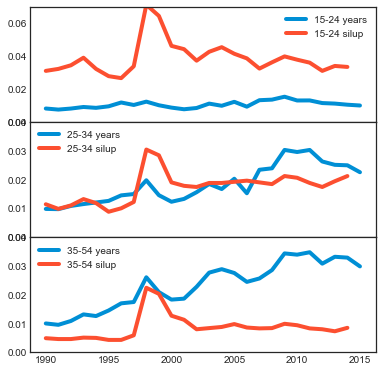

In [8]:
plt.style.use('seaborn-white')
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax3=fig.add_axes([0.1, -0.3, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
ax1.plot(korea_15_24['year'], korea_15_24['per'], label='15-24 years')
ax1.plot(silup['년도'], silup['15-24'],label='15-24 silup')
ax1.set(ylim=[0.00, 0.07]); ax1.legend()
ax2.plot(korea_25_34['year'], korea_25_34['per'], label='25-34 years')
ax2.plot(silup['년도'], silup['25-34'],label='25-34 silup')
ax2.set(ylim=[0.00, 0.04]); ax2.legend()
ax3.plot(korea_35_54['year'], korea_35_54['per'], label='35-54 years')
ax3.plot(silup['년도'], silup['35-54'],label='35-54 silup')
ax3.set(ylim=[0.00, 0.04]); ax3.legend()

#### 실업률과 자살률의 관계

In [9]:
def plot(arr1, arr2, arr1name, arr2name):
    Table().with_columns(arr1name, arr1, arr2name, arr2).plot(arr1name)
def scatter(arr1, arr2, arr1name, arr2name):
    Table().with_columns(arr1name, arr1, arr2name, arr2).scatter(arr1name)
def table(arr1, arr2, arr1name, arr2name):
    return Table().with_columns(arr1name, arr1, arr2name, arr2)

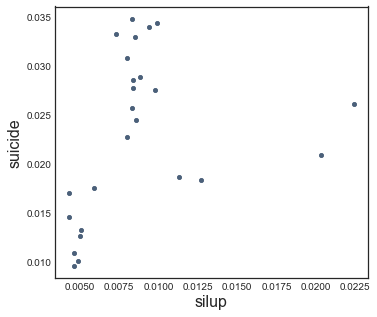

In [10]:
scatter(silup['35-54'], korea_35_54.where('year', are.below(2015))['per'], 'silup', 'suicide')

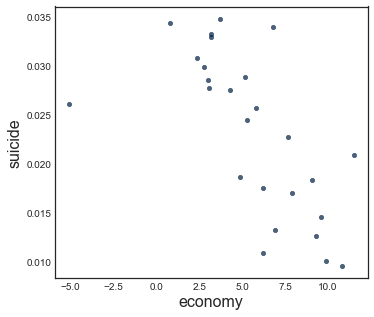

In [11]:
scatter(economy['per'], korea_35_54.where('year', are.below(2016))['per'], 'economy', 'suicide')

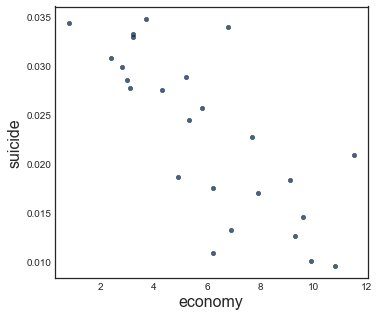

In [12]:
table(economy['per'], korea_35_54.where('year', are.below(2016))['per'], 'economy', 'suicide').where('economy', are.above(0)).scatter('economy')

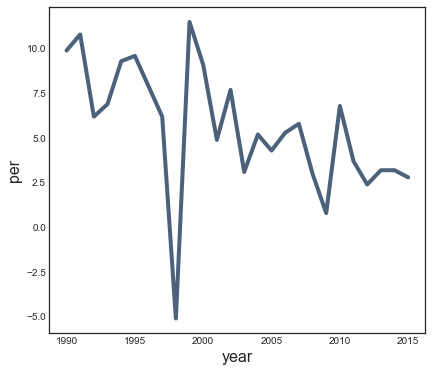

In [13]:
economy.plot('year')

#### 우울증

In [169]:
uul=Table().read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\우울증상담.csv")
uul

지표년도,성별,연령,구분,조사건수,분율
2007,전체,nan,전체,2983,2.2
2007,전체,19-29세,연령대,339,0.9
2007,전체,19-64세,연령대,2261,1.8
2007,전체,30-39세,연령대,635,1.9
2007,전체,40-49세,연령대,565,1.4
2007,전체,50-59세,연령대,505,3.1
2007,전체,60-69세,연령대,490,3.7
2007,전체,65세이상,연령대,722,4.8
2007,전체,70세이상,연령대,449,4.8
2007,남성,19-29세,성별/연령대,141,0.5


### 가설 1. 경제가 악화될수록 자살률이 증가한다.

In [17]:
gdp = Table.read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\GDP증감률.csv").where('년도', are.below(2016))

whosuicide = Table.read_table("https://raw.githubusercontent.com/Sianus/US_Study/wobin/DataScience%20Project/Project/2022.06.21%20Project/Suicid/archive/who_suicide_statistics.csv")

whosuicide=whosuicide.where('year', are.above_or_equal_to(1990)) #1990년부터
whosuicide=whosuicide.where('suicides_no', are.above_or_equal_to(0)) #nan 제거
whosuicide=whosuicide.where('population', are.above_or_equal_to(0)) #nan 제거
korea=whosuicide.where('country', 'Republic of Korea').group(['year', 'age'], np.sum).drop(2,3) #한국 데이터, 연도와 나이 그룹화
korea['population sum']/=1000 #population sum 단위 조정
korea=korea.relabeled('population sum', 'population(unit : 1000)') #단위 조정
korea=korea.relabeled('suicides_no sum', 'suicides num') #열 이름 변경
korea=korea.with_column('per', 
                (korea['suicides num']/1000)/korea['population(unit : 1000)']*100) #비율 추가
korea=korea.where('age', are.not_equal_to('55-74 years')).where('age', are.not_equal_to('75+ years')) #나이를 5~54세까지로 한정

silup = "F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\실업률.csv"
silup = Table.read_table(silup)
silup = silup.with_column('15-24', 
                ((silup['15 - 19세'])+(silup['20 - 24세']))/2)
silup = silup.with_column('25-34', 
                ((silup['25 - 29세'])+(silup['30 - 34세']))/2)
silup = silup.with_column('35-54', 
                ((silup['35 - 39세'])+(silup['40 - 44세'])+(silup['45 - 49세'])+(silup['50 - 54세']))/4).drop(1,2,3,4,5,6,7,8,9,10,11)
silup

년도,15-24,25-34,35-54
1990,7.75,2.85,1.225
1991,8.05,2.45,1.15
1992,8.6,2.75,1.15
1993,9.75,3.3,1.275
1994,8.05,2.95,1.25
1995,6.95,2.2,1.075
1996,6.65,2.5,1.075
1997,8.45,3.05,1.475
1998,17.8,7.6,5.6
1999,16.1,7.1,5.075


#### 실업률과 자살률 그래프

##### 25-34세

In [25]:
korea['per']*=100

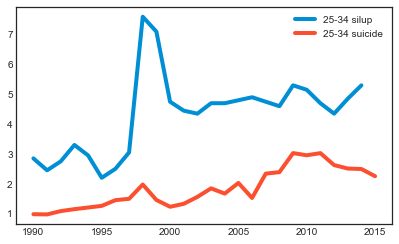

In [29]:
fig = plt.figure()
ax = plt.axes()
korea_25_34=korea.where('age', '25-34 years')
ax.plot(silup['년도'],silup['25-34'], label="25-34 silup")
ax.plot(korea_25_34['year'], korea_25_34['per'], label='25-34 suicide')
ax.legend()

##### 35-54세

35-54세가 경제의 영향을 더 많이 받는다?

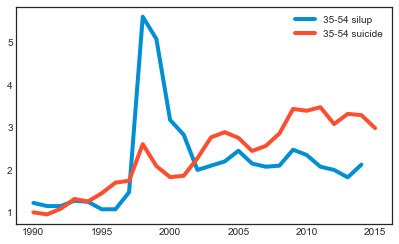

In [30]:
fig = plt.figure()
ax = plt.axes()
korea_35_54=korea.where('age', '35-54 years')
ax.plot(silup['년도'],silup['35-54'], label="35-54 silup")
ax.plot(korea_35_54['year'], korea_35_54['per'], label='35-54 suicide')
ax.legend()

##### 15-24세

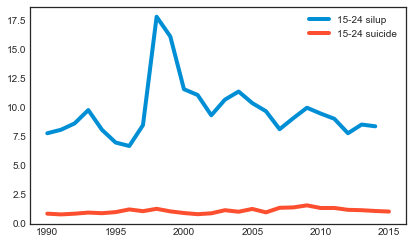

In [33]:
fig = plt.figure()
ax = plt.axes()
korea_15_24=korea.where('age', '15-24 years')
ax.plot(silup['년도'],silup['15-24'], label="15-24 silup")
ax.plot(korea_15_24['year'], korea_15_24['per'], label='15-24 suicide')
ax.legend()

In [48]:
gdp=gdp.where('년도', are.below(2015))

In [55]:
gdp

년도,"국내총생산(시장가격, GDP)",국내총소득(GDI),국민총소득(GNI)
1990,9.9,9.3,9.5
1991,10.8,10.9,10.9
1992,6.2,6.2,6.1
1993,6.9,7.2,7.2
1994,9.3,9.5,9.4
1995,9.6,8.9,8.8
1996,7.9,6.6,6.7
1997,6.2,4.2,4
1998,-5.1,-7,-7.7
1999,11.5,10.5,10.7


In [47]:
silup.show()

년도,15-24,25-34,35-54
1990,7.75,2.85,1.225
1991,8.05,2.45,1.15
1992,8.6,2.75,1.15
1993,9.75,3.3,1.275
1994,8.05,2.95,1.25
1995,6.95,2.2,1.075
1996,6.65,2.5,1.075
1997,8.45,3.05,1.475
1998,17.8,7.6,5.6
1999,16.1,7.1,5.075


In [77]:
gdp.where('국내총생산(시장가격, GDP)', np.min(gdp['국내총생산(시장가격, GDP)'])).drop(2,3).join('년도',silup.where('25-34', np.max(silup['25-34'])).drop(1,2)).relabeled(1, 'GDP').relabeled(2,'실업')

년도,GDP,실업
1998,-5.1,5.6


In [72]:
silup.where('25-34', np.max(silup['25-34'])).drop(1,2)

년도,35-54
1998,5.6


In [65]:
np.max(gdp['국내총생산(시장가격, GDP)']), np.min(gdp['국내총생산(시장가격, GDP)'])

(11.5, -5.1)

In [67]:
np.max(silup['35-54']), np.min(silup['35-54'])

(5.6, 1.075)

[Text(0.5, 0, 'year'), Text(0, 0.5, 'GDP')]

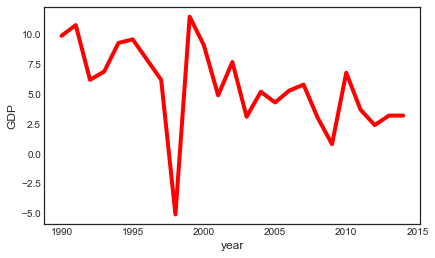

In [63]:
fig = plt.figure()
ax = plt.axes()
ax.plot(gdp['년도'], gdp['국내총생산(시장가격, GDP)'], label='gdp', color='red')
ax.set(xlabel='year', ylabel='GDP')

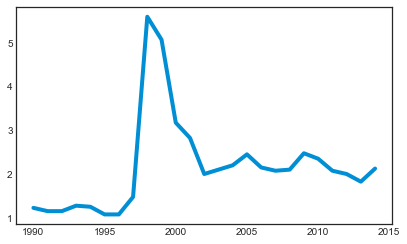

In [58]:
plt.plot(silup['년도'], silup['35-54'], label='silup')

##### 추가분석

In [107]:
korea_35_54=whosuicide.where('country', 'Republic of Korea').group(['year', 'age'], np.sum).drop(2,3).where('age', '35-54 years')
korea_35_54=korea_35_54.with_column('per', korea_35_54[2]/korea_35_54[3]*100)
korea_35_54

year,age,suicides_no sum,population sum,per
1990,35-54 years,978,9.7626e+06,0.0100178
1991,35-54 years,964,1.01029e+07,0.00954181
1992,35-54 years,1135,1.04366e+07,0.0108752
1993,35-54 years,1421,1.07961e+07,0.0131622
1994,35-54 years,1408,1.11852e+07,0.0125881
1995,35-54 years,1692,1.1654e+07,0.0145186
1996,35-54 years,2065,1.2147e+07,0.0170001
1997,35-54 years,2191,1.25511e+07,0.0174566
1998,35-54 years,3358,1.28916e+07,0.026048
1999,35-54 years,2770,1.32558e+07,0.0208965


In [105]:
korea_female=whosuicide.where('country', 'Republic of Korea').where('sex', 'female')
korea_female=korea_female.with_column('per', korea_female['suicides_no']/korea_female['population']*100)
female_35_54=korea_female.where('age', '35-54 years')
female_35_54

country,year,sex,age,suicides_no,population,per
Republic of Korea,1990,female,35-54 years,242,4.7813e+06,0.00506138
Republic of Korea,1991,female,35-54 years,256,4.9512e+06,0.00517046
Republic of Korea,1992,female,35-54 years,312,5.1196e+06,0.00609423
Republic of Korea,1993,female,35-54 years,381,5.3012e+06,0.00718705
Republic of Korea,1994,female,35-54 years,383,5.4951e+06,0.00696985
Republic of Korea,1995,female,35-54 years,427,5.7252e+06,0.00745825
Republic of Korea,1996,female,35-54 years,532,5.9683e+06,0.00891376
Republic of Korea,1997,female,35-54 years,535,6.1634e+06,0.00868027
Republic of Korea,1998,female,35-54 years,714,6.3234e+06,0.0112914
Republic of Korea,1999,female,35-54 years,683,6.4973e+06,0.0105121


In [111]:
korea_male=whosuicide.where('country', 'Republic of Korea').where('sex', 'male')
korea_male=korea_male.with_column('per', korea_male['suicides_no']/korea_male['population']*100)
male_35_54=korea_male.where('age', '35-54 years')
male_35_54

country,year,sex,age,suicides_no,population,per
Republic of Korea,1990,male,35-54 years,736,4.9813e+06,0.0147753
Republic of Korea,1991,male,35-54 years,708,5.1517e+06,0.013743
Republic of Korea,1992,male,35-54 years,823,5.317e+06,0.0154787
Republic of Korea,1993,male,35-54 years,1040,5.4949e+06,0.0189266
Republic of Korea,1994,male,35-54 years,1025,5.6901e+06,0.0180137
Republic of Korea,1995,male,35-54 years,1265,5.9288e+06,0.0213365
Republic of Korea,1996,male,35-54 years,1533,6.1787e+06,0.024811
Republic of Korea,1997,male,35-54 years,1656,6.3877e+06,0.0259248
Republic of Korea,1998,male,35-54 years,2644,6.5682e+06,0.0402546
Republic of Korea,1999,male,35-54 years,2087,6.7585e+06,0.0308796


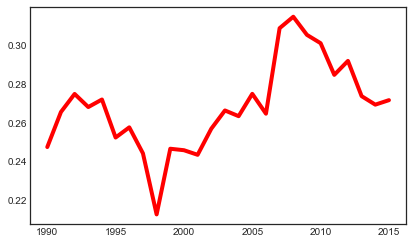

In [118]:
#35-54세 
plt.plot(female_35_54['year'], female_35_54['suicides_no']/korea_35_54['suicides_no sum'], color='red')

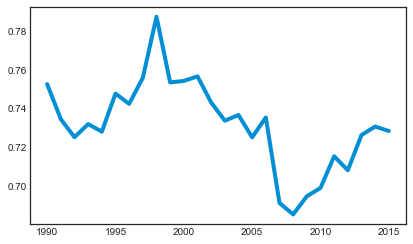

In [117]:
plt.plot(male_35_54['year'], male_35_54['suicides_no']/korea_35_54['suicides_no sum'])

### 가설 2. 우울증 상담을 받으면 자살할 확률이 낮아진다.

In [170]:
uul

지표년도,성별,연령,구분,조사건수,분율
2007,전체,nan,전체,2983,2.2
2007,전체,19-29세,연령대,339,0.9
2007,전체,19-64세,연령대,2261,1.8
2007,전체,30-39세,연령대,635,1.9
2007,전체,40-49세,연령대,565,1.4
2007,전체,50-59세,연령대,505,3.1
2007,전체,60-69세,연령대,490,3.7
2007,전체,65세이상,연령대,722,4.8
2007,전체,70세이상,연령대,449,4.8
2007,남성,19-29세,성별/연령대,141,0.5


In [171]:
uul3=uul.where('구분', '전체')
uul3

지표년도,성별,연령,구분,조사건수,분율
2007,전체,nan,전체,2983,2.2
2008,전체,nan,전체,6817,2.9
2009,전체,nan,전체,7511,3.3
2010,전체,nan,전체,6251,3.4
2011,전체,nan,전체,6026,4.1
2012,전체,nan,전체,5609,4
2013,전체,nan,전체,5365,3.5
2014,전체,nan,전체,5036,5.1


In [172]:
uul2=uul.where('구분', '성별')
uul2

지표년도,성별,연령,구분,조사건수,분율
2007,남성,nan,성별,1242,1.3
2007,여성,nan,성별,1741,3.1
2008,남성,nan,성별,2847,1
2008,여성,nan,성별,3970,4.7
2009,남성,nan,성별,3252,1.6
2009,여성,nan,성별,4259,5
2010,남성,nan,성별,2698,1.6
2010,여성,nan,성별,3553,5.1
2011,남성,nan,성별,2556,2
2011,여성,nan,성별,3470,6.2


In [143]:
#2007~2014 남녀 자살률
sexsuicide=whosuicide.where('country', 'Republic of Korea').group(['year', 'sex'], np.sum).where('year', are.between_or_equal_to(2007,2014)).drop(2,3,)
sexsuicide=sexsuicide.with_column('per', sexsuicide[2]/sexsuicide[3]*100)
sexsuicide

year,sex,suicides_no sum,population sum,per
2007,female,4427,2.33913e+07,0.0189259
2007,male,7747,2.34229e+07,0.0330744
2008,female,4598,2.35357e+07,0.0195363
2008,male,8260,2.3566e+07,0.0350505
2009,female,5475,2.3679e+07,0.0231217
2009,male,9927,2.3701e+07,0.0418844
2010,female,5237,2.37979e+07,0.0220062
2010,male,10321,2.38007e+07,0.0433642
2011,female,5040,2.3908e+07,0.0210808
2011,male,10866,2.389e+07,0.0454834


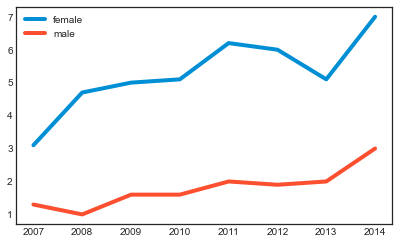

In [173]:
plt.plot(uul2.where('성별', '여성')['지표년도'], uul2.where('성별', '여성')['분율'], label='female')
plt.plot(uul2.where('성별', '남성')['지표년도'], uul2.where('성별', '남성')['분율'], label='male')
plt.legend()

In [182]:
korea_07_14=whosuicide.where('country', 'Republic of Korea').group(['year', 'sex'], np.sum).where('year', are.between_or_equal_to(2007, 2014)).drop(2,3)
korea_07_14=korea_07_14.with_column('per', korea_07_14[2]/korea_07_14[3]*100)
korea_07_14

year,sex,suicides_no sum,population sum,per
2007,female,4427,2.33913e+07,0.0189259
2007,male,7747,2.34229e+07,0.0330744
2008,female,4598,2.35357e+07,0.0195363
2008,male,8260,2.3566e+07,0.0350505
2009,female,5475,2.3679e+07,0.0231217
2009,male,9927,2.3701e+07,0.0418844
2010,female,5237,2.37979e+07,0.0220062
2010,male,10321,2.38007e+07,0.0433642
2011,female,5040,2.3908e+07,0.0210808
2011,male,10866,2.389e+07,0.0454834


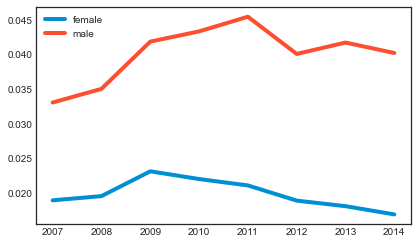

In [183]:
plt.plot(korea_07_14.where('sex', 'female')['year'], korea_07_14.where('sex', 'female')['per'], label='female')
plt.plot(korea_07_14.where('sex', 'male')['year'], korea_07_14.where('sex', 'male')['per'], label='male')
plt.legend()

##### 항우울제 이야기

In [234]:
hanguul=Table().read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\항우울제.csv")
oecdsuicide=Table().read_table("F:\\2-1\\데이터사이언스\\텀프로젝트\\data\\OECD자살률.csv")

In [255]:
hanguul.where('country', 'AUS')

country,hanguul


In [254]:
oecdsuicide

country,Value
AUS,13
AUT,12.4
CAN,11
CZE,12.4
DNK,9.5
FIN,14.6
DEU,9.5
GRC,4.4
HUN,15.1
ISL,9.7


In [235]:
oecdsuicideandhanguul=oecdsuicide.join('country',hanguul)

In [236]:
oecdsuicideandhanguul

country,Value,hanguul
AUT,12.4,61
CAN,11,110.3
CHL,10.4,41.4
CZE,12.4,59.9
DEU,9.5,56.9
DNK,9.5,75.7
ESP,7,77.2
EST,16.1,28.8
FIN,14.6,70.2
GRC,4.4,55.1


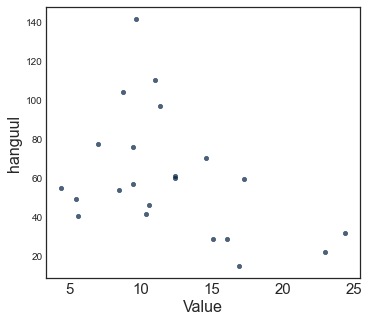

In [260]:
oecdsuicideandhanguul.scatter('Value', 'hanguul')

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  
standardoecdandhanguul=Table().with_columns('suicides', standard_units(oecdsuicideandhanguul['Value']), 'hanguul', standard_units(oecdsuicideandhanguul['hanguul']))
standardoecdandhanguul

suicides,hanguul
0.0775219,0.0241908
-0.196923,1.64378
-0.314543,-0.619702
0.0775219,-0.0119461
-0.490972,-0.110501
-0.490972,0.50711
-0.981052,0.556387
0.802841,-1.03363
0.508793,0.326426
-1.49074,-0.169634


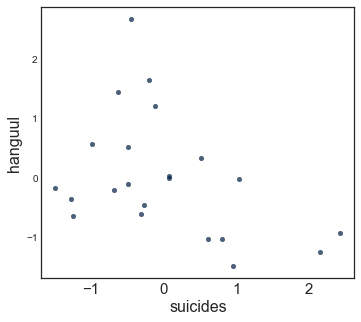

In [ ]:
standardoecdandhanguul.scatter('suicides')

In [270]:
def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))
correlation(oecdsuicideandhanguul, 'Value', 'hanguul')

-0.409660875378731

앙 기모찌